In [73]:
from cryptocmd import CmcScraper

# initialise scraper without time interval for max historical data
scraper = CmcScraper("BTC")
# Pandas dataFrame for the same data
df = scraper.get_dataframe()

In [74]:
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,2023-05-13,26807.769044,27030.482960,26710.873803,26784.078561,9.999172e+09,5.188737e+11
1,2023-05-12,26987.662514,27055.647228,25878.428830,26804.990671,1.931360e+10,5.192540e+11
2,2023-05-11,27621.086872,27621.941986,26781.827002,27000.788271,1.672434e+10,5.230230e+11
3,2023-05-10,27654.636777,28322.688328,26883.669883,27621.756227,2.065603e+10,5.350262e+11
4,2023-05-09,27695.068069,27821.400606,27375.600690,27658.774673,1.412859e+10,5.357136e+11
...,...,...,...,...,...,...,...
3663,2013-05-02,116.379997,125.599998,92.281898,105.209999,0.000000e+00,1.168517e+09
3664,2013-05-01,139.000000,139.889999,107.720001,116.989998,0.000000e+00,1.298955e+09
3665,2013-04-30,144.000000,146.929993,134.050003,139.000000,0.000000e+00,1.542813e+09
3666,2013-04-29,134.444000,147.488007,134.000000,144.539993,0.000000e+00,1.603769e+09


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668 entries, 0 to 3667
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3668 non-null   datetime64[ns]
 1   Open        3668 non-null   float64       
 2   High        3668 non-null   float64       
 3   Low         3668 non-null   float64       
 4   Close       3668 non-null   float64       
 5   Volume      3668 non-null   float64       
 6   Market Cap  3668 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 200.7 KB


In [76]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,3668.000000,3668.000000,3668.000000,3668.000000,3.668000e+03,3.668000e+03
mean,11568.175655,11855.224115,11252.233530,11574.203517,1.431455e+10,2.145417e+11
std,15545.256138,15937.610187,15096.632254,15543.016793,1.914408e+10,2.941958e+11
min,68.504997,74.561096,65.526001,68.431000,0.000000e+00,7.784112e+08
25%,527.036499,542.904510,503.585243,527.104507,4.690110e+07,7.092836e+09
50%,6087.250000,6258.685059,5840.020020,6112.099854,4.897270e+09,1.054264e+11
75%,16360.171325,16645.509723,15843.748973,16416.069326,2.520100e+10,2.968119e+11
max,67549.735581,68789.625939,66382.061008,67566.830088,3.509679e+11,1.274831e+12


In [77]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [78]:
df.duplicated().sum()

0

In [79]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2023-05-13,26807.769044,27030.482960,26710.873803,26784.078561,9.999172e+09,5.188737e+11
1,2023-05-12,26987.662514,27055.647228,25878.428830,26804.990671,1.931360e+10,5.192540e+11
2,2023-05-11,27621.086872,27621.941986,26781.827002,27000.788271,1.672434e+10,5.230230e+11
3,2023-05-10,27654.636777,28322.688328,26883.669883,27621.756227,2.065603e+10,5.350262e+11
4,2023-05-09,27695.068069,27821.400606,27375.600690,27658.774673,1.412859e+10,5.357136e+11


In [80]:
df['Tomorrow'] = df[['Close']].shift(1)

In [81]:
df['Target'] = (df['Tomorrow'] > df['Close']).astype(int)

In [82]:
df = df.dropna()

In [83]:
df = df.rename(columns={'Market Cap':'Market_Cap'})

In [84]:
df.head()

,Date,Open,High,Low,Close,Volume,Market_Cap,Tomorrow,Target
1,2023-05-12,26987.662514,27055.647228,25878.428830,26804.990671,1.931360e+10,5.192540e+11,26784.078561,0
2,2023-05-11,27621.086872,27621.941986,26781.827002,27000.788271,1.672434e+10,5.230230e+11,26804.990671,0
3,2023-05-10,27654.636777,28322.688328,26883.669883,27621.756227,2.065603e+10,5.350262e+11,27000.788271,0
4,2023-05-09,27695.068069,27821.400606,27375.600690,27658.774673,1.412859e+10,5.357136e+11,27621.756227,0
5,2023-05-08,28450.457478,28663.272332,27310.135612,27694.272896,1.912290e+10,5.363754e+11,27658.774673,0


In [85]:
df['Target'].value_counts()

1    1942
0    1725
Name: Target, dtype: int64

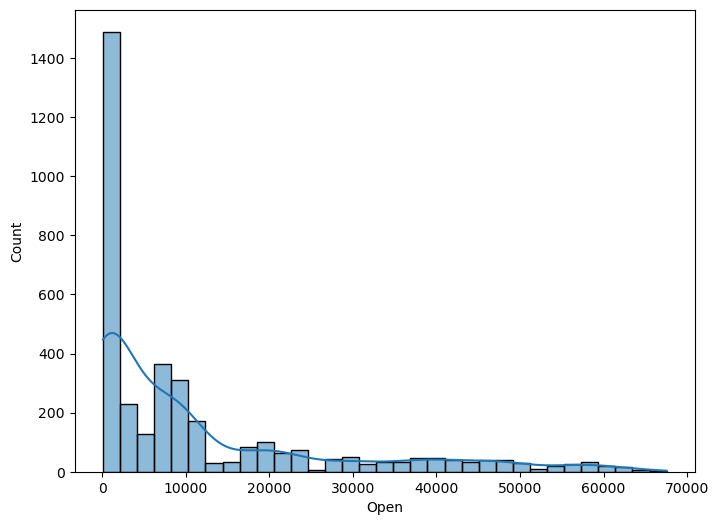

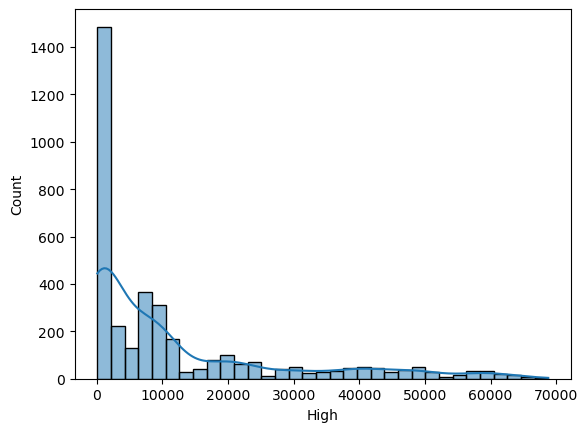

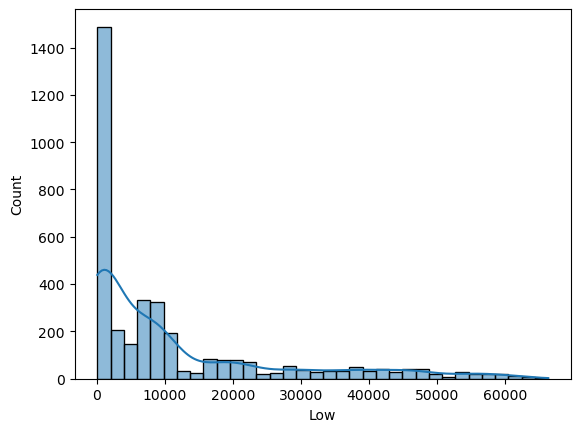

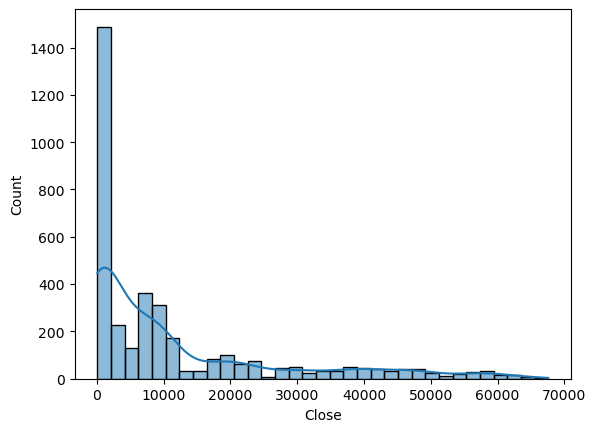

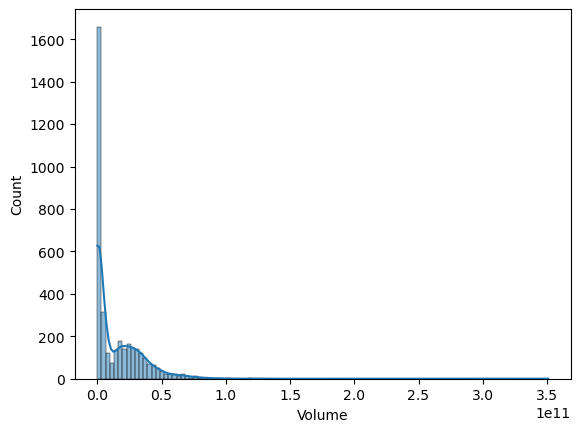

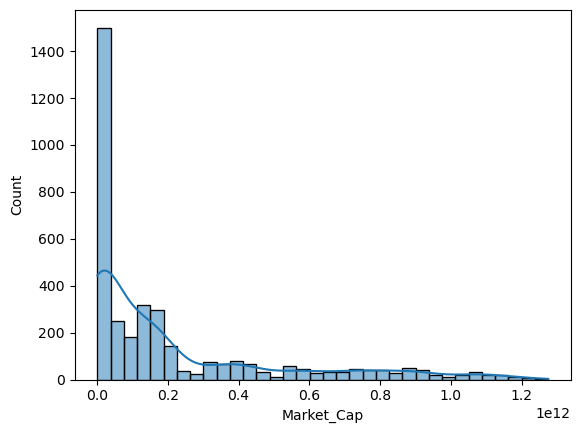

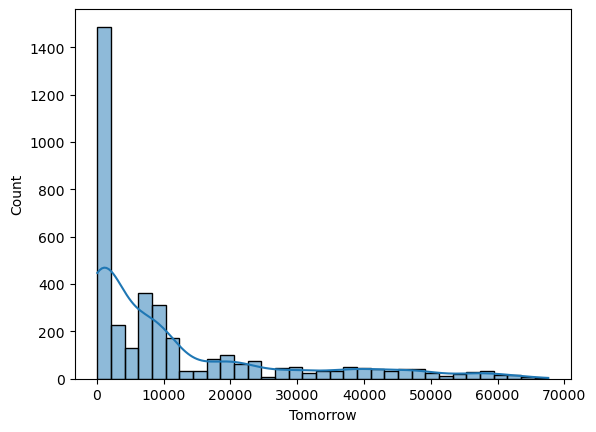

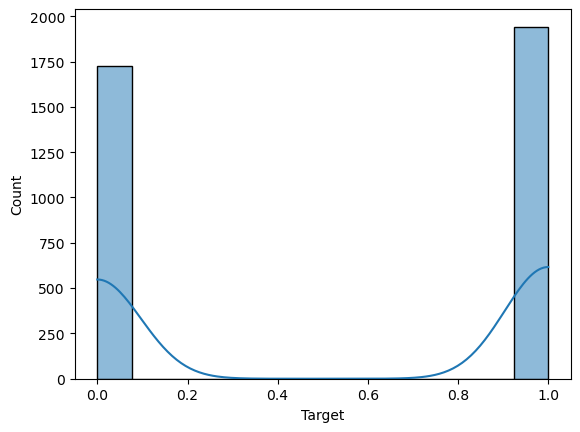

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in df:
    if i=="Date":
        continue
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<Figure size 1000x500 with 0 Axes>

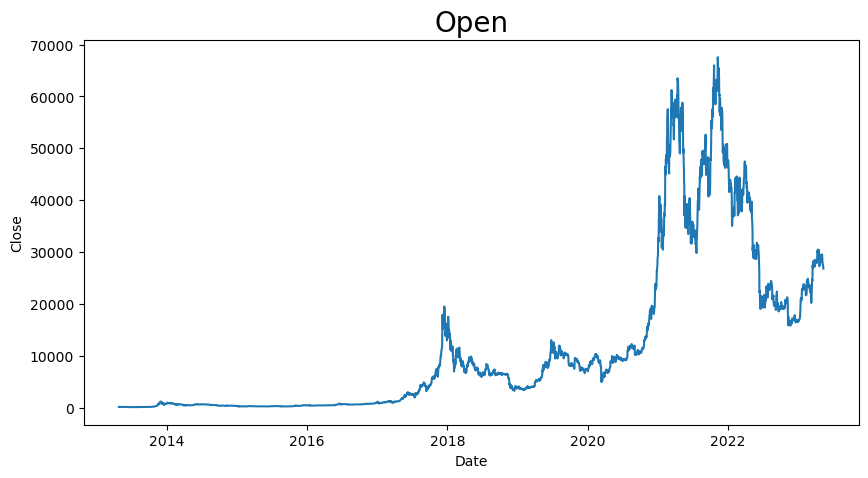

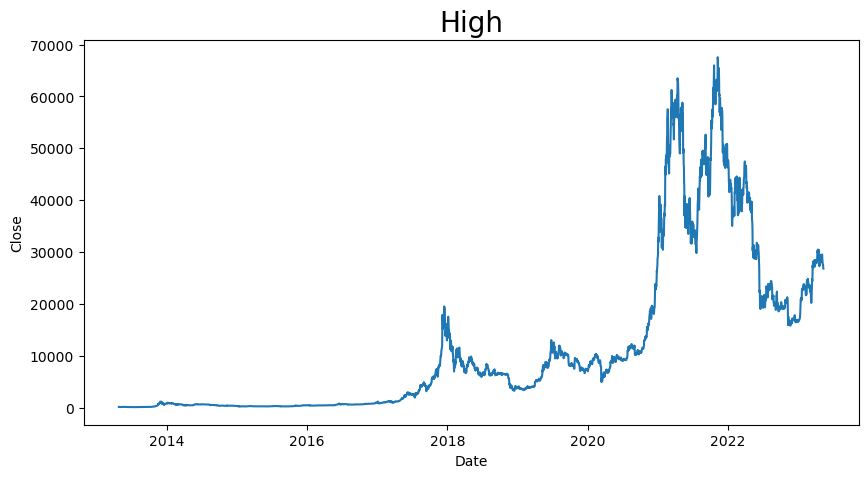

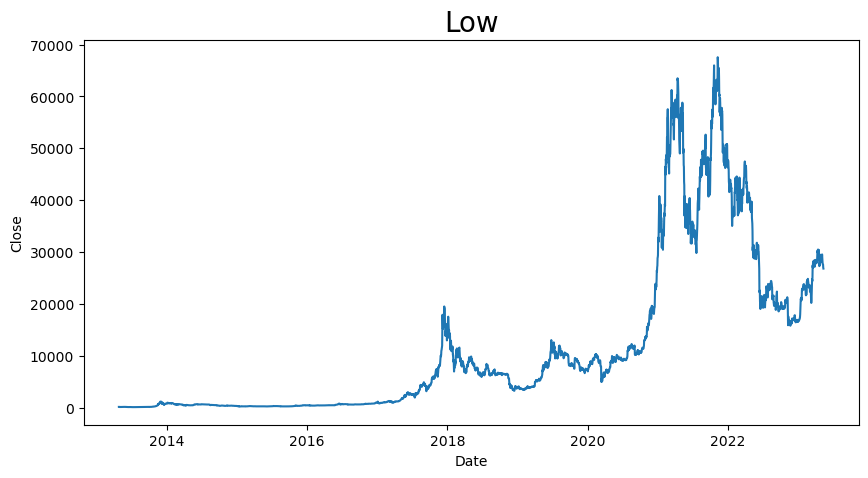

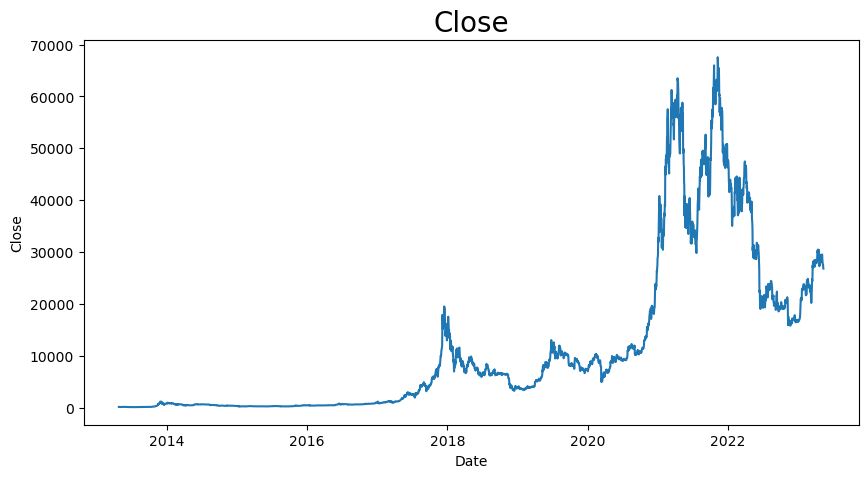

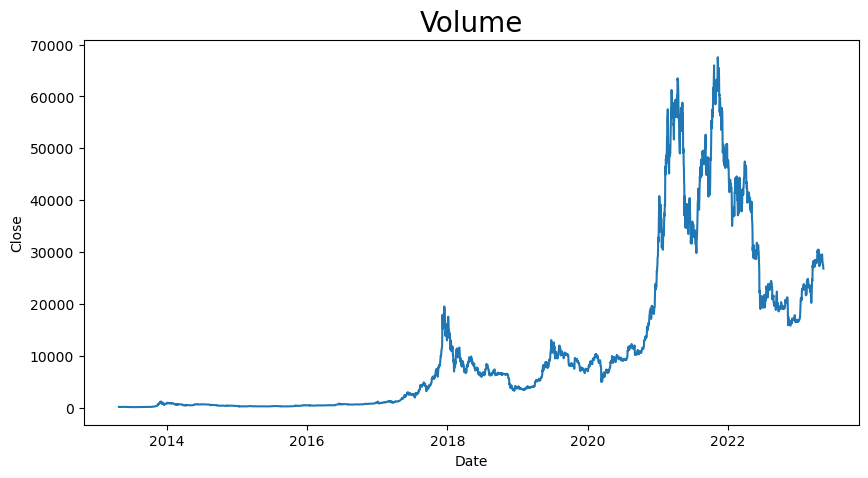

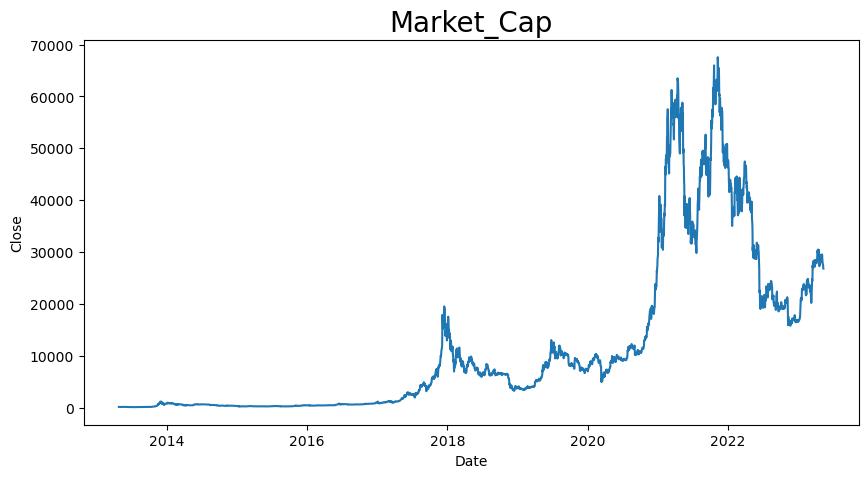

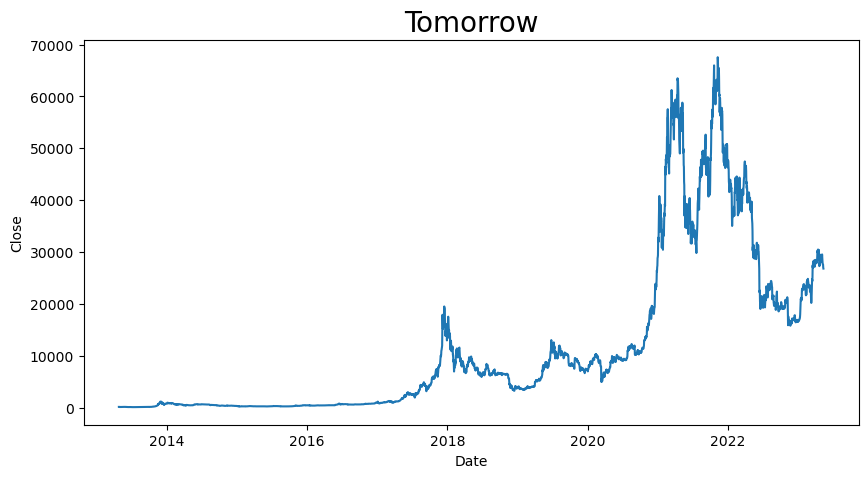

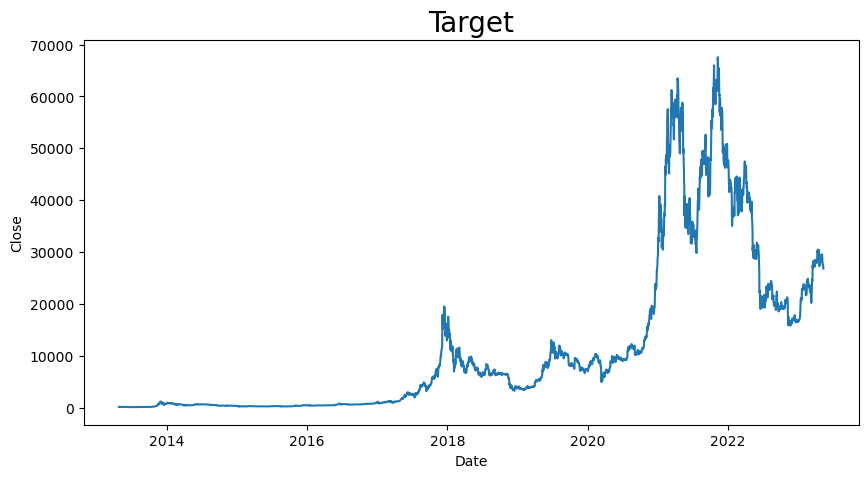

In [87]:
for i in df:
    plt.figure(figsize=(10,5))
    if i=='Date':
        continue
    sns.lineplot(data=df, x="Date", y="Close")
    plt.title(i, fontsize=20)
    plt.show()

    

In [88]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

C:\Users\shreyash12\AppData\Local\Temp\ipykernel_16536\4277794465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

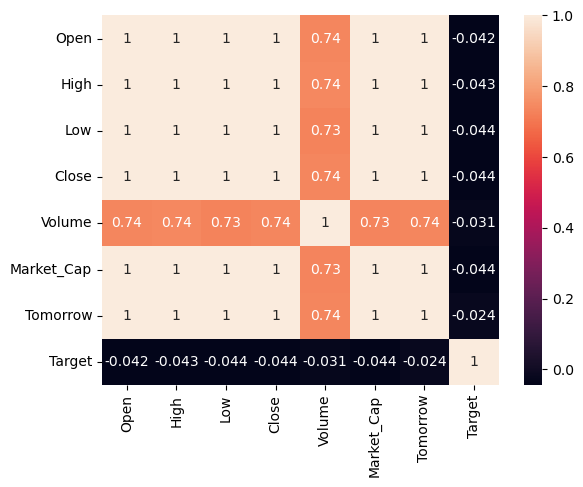

In [89]:
sns.heatmap(df.corr(),annot=True)

In [90]:
df.set_index("Date", inplace = True)

In [91]:
#data.drop(labels=['Unnamed: 0'],axis=1)

In [92]:
df.to_csv('Bitcoin_data.csv')